# Regression models for predicting fish weight

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [3]:
data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


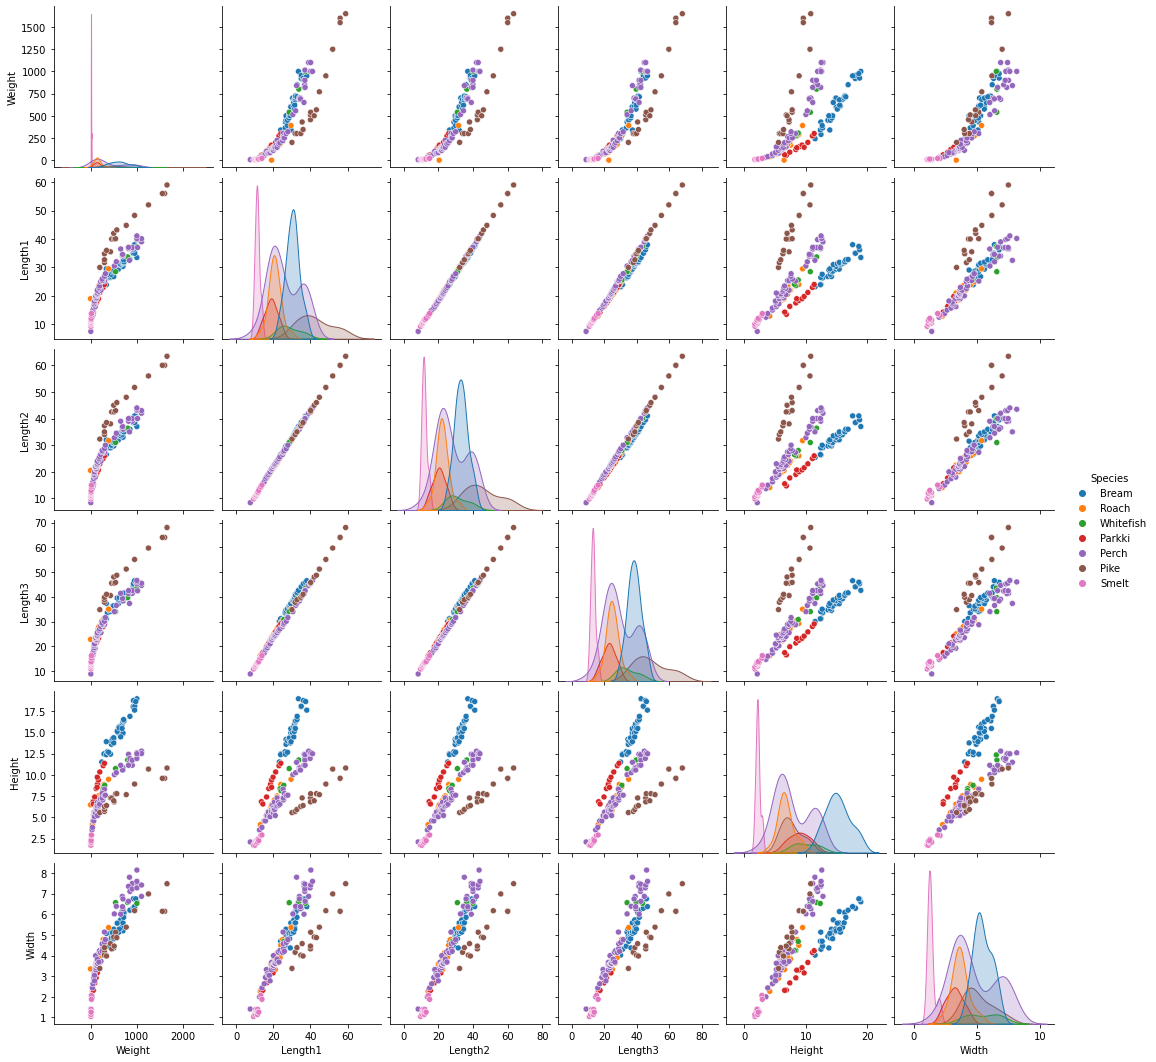

In [4]:
sns.pairplot(data, vars = ["Weight", "Length1", "Length2", "Length3", "Height", "Width"], hue = "Species")

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate

In [6]:
le = LabelEncoder()
species_as_int = le.fit_transform(data.Species.values)


In [7]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
scaler = MinMaxScaler()
df = pd.DataFrame(data[["Length1", "Length2", "Length3", "Height", "Width"]].values, columns = ["Length1", "Length2", "Length3", "Height", "Width"])
df["species"] = species_as_int

In [9]:
target = data.Weight

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.values, target)

In [11]:
lrm = LinearRegression()
lrm.fit(X_train, y_train);

In [12]:
lrm.score(X_test, y_test)

0.8433904838340207

In [13]:
cv = cross_validate(lrm, X_train, y_train, cv = 10)

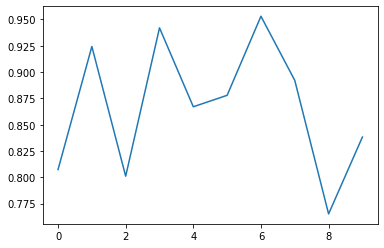

In [14]:
plt.plot(cv["test_score"])

In [15]:
lrm.score(X_test, y_test)

0.8433904838340207

In [16]:
rfm = RandomForestRegressor(max_depth=10, n_estimators = 500)
rfm.fit(X_train, y_train)
rfm.score(X_test, y_test)

0.9741624343028076

In [17]:
cv = cross_validate(rfm, X_train, y_train, cv = 20)

In [18]:
cv

{'fit_time': array([0.36304712, 0.3360045 , 0.34886265, 0.33861804, 0.34174037,
        0.36533022, 0.3562026 , 0.34962845, 0.37947369, 0.33216238,
        0.35112453, 0.34486318, 0.38453627, 0.36264157, 0.36121035,
        0.36533213, 0.36537409, 0.338835  , 0.33921957, 0.34705281]),
 'score_time': array([0.01640987, 0.020998  , 0.0199306 , 0.01959157, 0.02029347,
        0.02191615, 0.02000928, 0.02126861, 0.02129078, 0.01941371,
        0.02139616, 0.02099943, 0.02144241, 0.01929092, 0.02060676,
        0.10946989, 0.02737141, 0.01699877, 0.01630878, 0.02939296]),
 'test_score': array([0.93713091, 0.97269941, 0.88246495, 0.99416119, 0.83323613,
        0.93317235, 0.96771606, 0.96455343, 0.9356649 , 0.96441885,
        0.99093565, 0.96629013, 0.97974824, 0.99199465, 0.97495265,
        0.95025811, 0.98596781, 0.9439237 , 0.89345986, 0.91992388])}

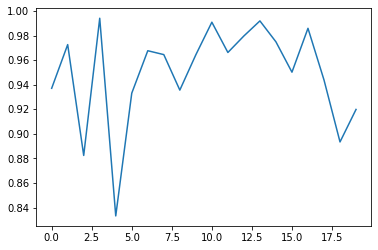

In [19]:
plt.plot(cv["test_score"])

In [20]:
lrm.predict(X_test[5:10, :])

array([648.83605701, 355.51121463, -37.2197688 , 396.3910076 ,
        59.9080532 ])

In [21]:
y_test[5:10]

111    840.0
70     273.0
61      55.0
130    300.0
80      85.0
Name: Weight, dtype: float64

Text(0.5, 0, 'sample')

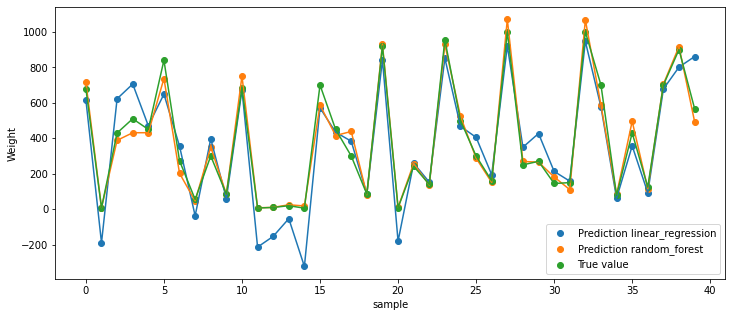

In [42]:
fig, ax = plt.subplots(figsize = (12,5))
ax.scatter(range(len(y_test)), lrm.predict(X_test), label = "Prediction linear_regression")
ax.scatter(range(len(y_test)), rfm.predict(X_test), label = "Prediction random_forest")
ax.scatter(range(len(y_test)), y_test.values, label = "True value")

ax.plot(range(len(y_test)), lrm.predict(X_test))
ax.plot(range(len(y_test)), rfm.predict(X_test))
ax.plot(range(len(y_test)), y_test.values)

# ax.scatter(range(len(y_test)),y_test.values, c = X_test[:, -1], s = 500, alpha = 0.5, cmap = "Paired")
# ax.scatter(range(len(y_test)),lrm.predict(X_test), c = X_test[:, -1], s = 500, alpha = 0.5, cmap = "Paired")
# ax.scatter(range(len(y_test)),rfm.predict(X_test), c = X_test[:, -1], s = 500, alpha = 0.5, cmap = "Paired")


ax.legend()

ax.set_ylabel("Weight")
ax.set_xlabel("sample")

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
np.sqrt(mean_squared_error(y_test, rfm.predict(X_test)))
r2_score(y_test, rfm.predict(X_test))

0.9741624343028076

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3,4,5],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [8, 10, 12, 14],
    'n_estimators': [100, 200, 300, 1000]
}

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid=param_grid, cv = 3, n_jobs=-1, verbose=2)

In [60]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [8, 10, 12, 14],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [61]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [62]:
best = grid_search.best_estimator_

In [63]:
best.score(X_test, y_test)

0.9717387725218464